## Seaborn
### Scatterplot with regression line

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


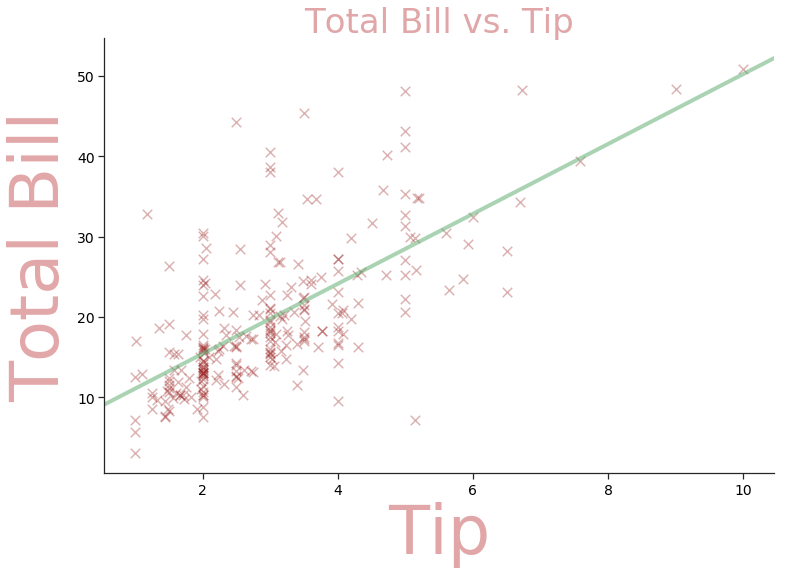

In [4]:
## For gridlines comment next line
sns.set(style="ticks")

## Here we create a matplotlib axes object. The extra parameters we use
## "ci" to remove confidence interval
## "marker" to have x as marker
## "scatter_kws" to provide style info for the points. [s for size]
## "line_kws" to provide style info for the line. [lw for line width]

g = sns.regplot(x="tip", y="total_bill", data=tips, ci=False,
               scatter_kws={"color": "darkred", "alpha": 0.3, "s": 90},
               line_kws={"color": "g", "alpha": 0.5, "LW": 4}, marker="x")

## remove the top and right line of the graph
sns.despine()

## Set the size of the graph from here
g.figure.set_size_inches(12, 8)
## Set the title of the graph
g.axes.set_title("Total Bill vs. Tip", fontsize=34, color="r", alpha=0.5)
## Set the xlabel of the graph
g.set_xlabel("Tip", size=67, color="r", alpha=0.5)
## Set the ylabel of the graph
g.set_ylabel("Total Bill", size=67, color="r", alpha=0.5)
## Set the ticklabel size and color of the graph
g.tick_params(labelsize=14, labelcolor="black")

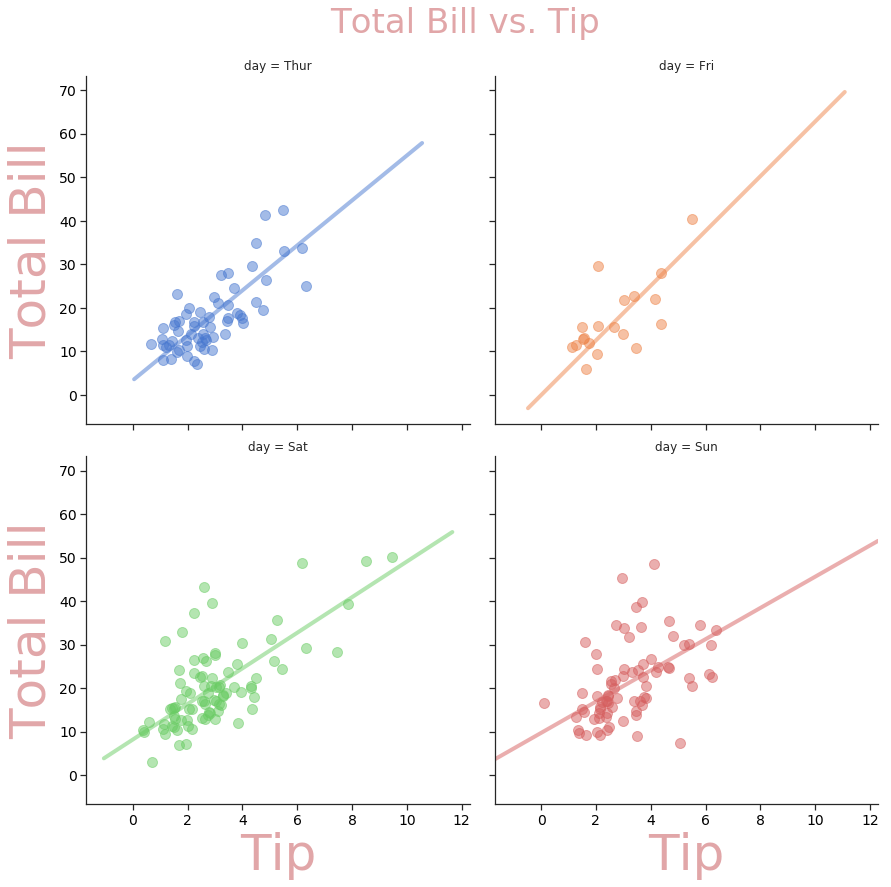

In [10]:
#####
# This creates a faceted plot, parameterized by the following:

# col         : divides the data points into days and creates that many plots
# palette     : deep, muted, pastel, bright, dark, and colorblind. 
#               change graph color. experiment with these.
# col_wrap    : we want two graphs in a row
# scatter_kws : attributes for points
# hue         : Colors for a particular column
# size        : controls the size of the graph
#####

g = sns.lmplot(x="tip", y="total_bill", ci=None, data=tips, col="day",
               palette="muted", col_wrap=2, scatter_kws={"s": 100, "alpha": 0.5},
               line_kws={"lw": 4, "alpha": 0.5}, hue="day", x_jitter=1.0,
               y_jitter=1.0, height=6)

# remove top and right line of graph
sns.despine()
# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the title of the graph
g.fig.suptitle("Total Bill vs. Tip", fontsize=34, color="r", alpha=0.5)

# set the xlabel of the graph
g.set_xlabels("Tip", size=50, color="r", alpha=0.5)

# set the ylabel of the graph
g.set_ylabels("Total Bill", size=50, color="r", alpha=0.5)

# set the ticklabel size and color of the graph
titles = ["Thursday", "Friday", "Saturday", "Sunday"]
for ax, title in zip(g.axes.flat, titles):
    ax.tick_params(labelsize=14, labelcolor="black")
    

#### A side Note on Palettes:
 You can build your own color palettes using color_palette() function. color_palette() will accept the name of any seaborn palette or matplotlib colormap(except jet, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples. This allows you to use your own color palettes in a graph.

### Barplots

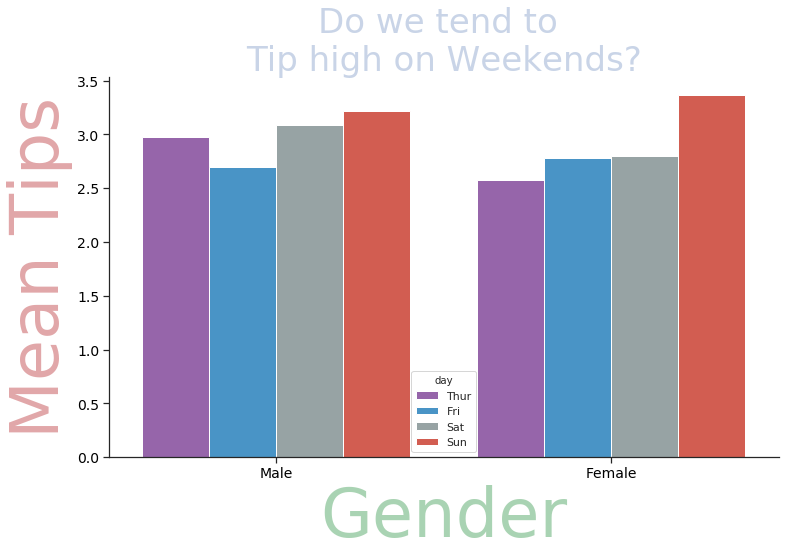

In [12]:
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# This function takes as input a custom palette
g = sns.barplot(x="sex", y="tip", hue="day",
               palette=sns.color_palette(flatui), data=tips, ci=None)

# remove the top and right lines of graph
sns.despine()

# Set the size of the graph
g.figure.set_size_inches(12, 7)
# Set the title of the graph
g.axes.set_title("Do we tend to \nTip high on Weekends?",
                fontsize=34, color="b", alpha=0.3)
# Set the xlabel of the graph
g.set_xlabel("Gender", size=67, color="g", alpha=0.5)
# Set the ylabel of the graph
g.set_ylabel("Mean Tips", size=67, color="r", alpha=0.5)
# Set the ticklabel size and color of the graph
g.tick_params(labelsize=14, labelcolor="black")

# Histograms and Distribution Diagrams

They form another part of my workflow. Let us plot the normal histogram using seaborn. For this, we will use the function. This function combines the matplotlib hist function (with automatic calculation of a good dfeault bin size) with the seaborn kdeplot() function. It can also fit **scipy.stats** distributions and plot the estimted PDF over the data.

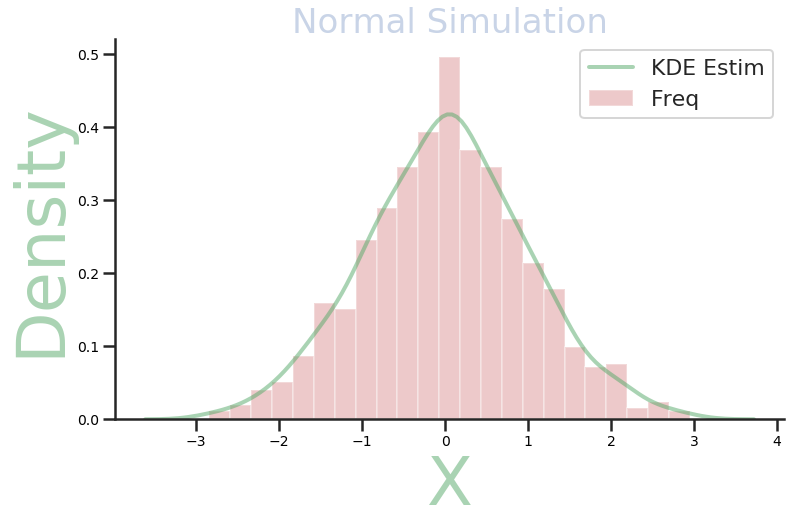

In [15]:
import numpy as np
# create a list of 1000 Normal RVs
x = np.random.normal(size=1000)

sns.set_context("poster")
sns.set_style("ticks")
# This function creates a normed histogram by default.
# If we use the parameter kde=False and norm_hist=False
# then we will be using a count histogram

kde_atts = {"color":"g","lw":4,"label":"KDE Estim","alpha":0.5}
hist_atts = {"color":"r","alpha":0.3,"label":"Freq"}
g = sns.distplot(x, kde_kws=kde_atts, hist_kws=hist_atts)

# remove the top and right lines from graph
sns.despine()

# Set the size of the graph
g.figure.set_size_inches(12, 7)
# Set the title of the graph
g.axes.set_title("Normal Simulation", fontsize=34, color="b", alpha=0.3)
# Set the xlabel of the graph
g.set_xlabel("X", size=67, color="g", alpha=0.5)
# Set the ylabel of the graph
g.set_ylabel("Density", size=67, color="g", alpha=0.5)
# Set the ticklabel size and color of the graph
g.tick_params(labelsize=14, labelcolor="black")

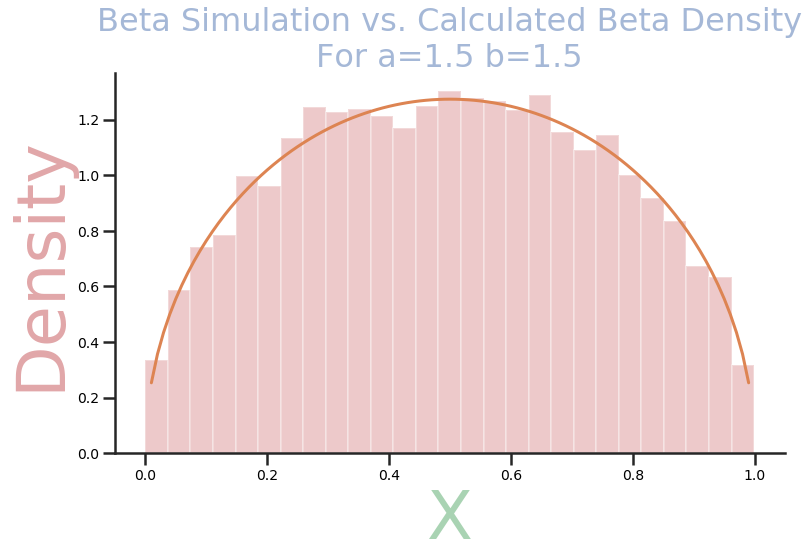

In [18]:
import scipy.stats as stats

a = 1.5
b = 1.5
x = np.arange(0.01, 1, 0.01)
y = stats.beta.rvs(a, b, size=10000)
y_act = stats.beta.pdf(x, a, b)

g = sns.distplot(y, kde=False, norm_hist=True, kde_kws=kde_atts, hist_kws=hist_atts)

# Note that we plot graph using plt matpltlib function
plt.plot(x, y_act)

# remove the top and right lines from graph
sns.despine()

# Set the size of the graph
g.figure.set_size_inches(12, 7)
# Set the title of the graph
g.axes.set_title(f"Beta Simulation vs. Calculated Beta Density\nFor a={a} b={b}",
                fontsize=32, color="b", alpha=0.5)
# Set the xlabel for the graph
g.set_xlabel("X", size=67, color="g", alpha=0.5)
# Set the ylabel for the graph
g.set_ylabel("Density", size=67, color="r", alpha=0.5)
# Set the ticklabel size and color of the graph
g.tick_params(labelsize=14, labelcolor="black")

## PairPlots

You need to see how variables vary with one another. What is the distribution of variables in the dataset? This is the graph to use with the function. Very helpful and seaborn makes it a joy to use. We will use **Iris Dataset** for this example.

In [19]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 0.98, 'Relation between Sepal Width and Sepal Length')

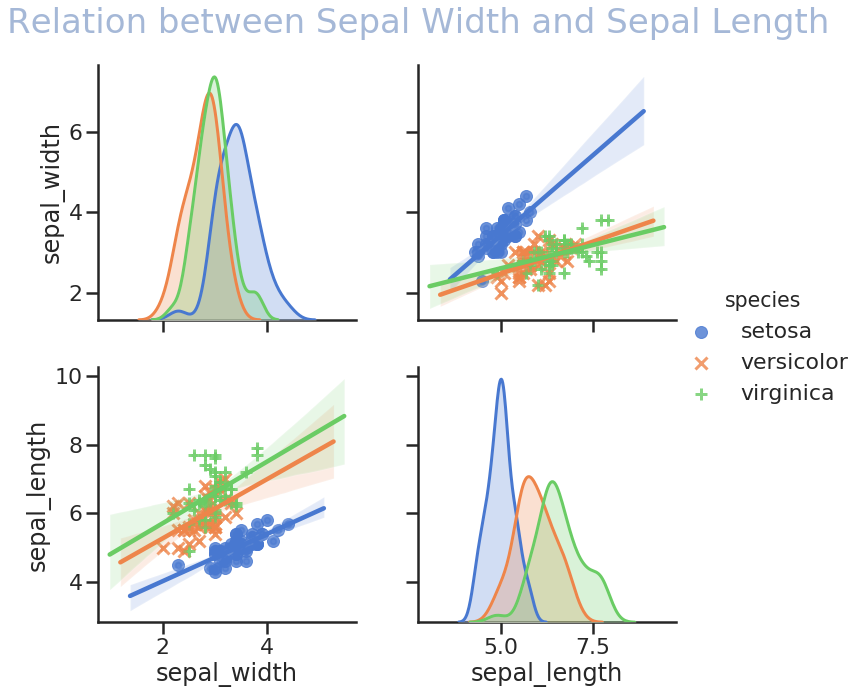

In [21]:
# Create a Pairplot
g = sns.pairplot(iris, hue="species", palette="muted", height=5,
                vars=["sepal_width", "sepal_length"], kind='reg', markers=['o', 'x', '+'])

# To change the size of scatter points in graph
g = g.map_offdiag(plt.scatter, s=35, alpha=0.5)

# remove the top and right lines from graph
sns.despine()
# additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the title of the graph
g.fig.suptitle("Relation between Sepal Width and Sepal Length", fontsize=34, color="b", alpha=0.5)